In [1]:
!pip install tpot
from tpot import TPOTRegressor
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 10.4 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11954 sha256=e2c5f2593d7515e9a34a09292c9632d92b76ae03f65a9511a689643249d3003c
  Stored in directory: /root/.cache/pip/wheels/48/8c/93/3afb1916772591fe6bcc25cdf8b1c5bdc362f0ec8e2f0fd413
Successfully built stopit


In [ ]:
#importing data from a local CSV file
from google.colab import files
uploaded = files.upload()

Saving 500s45f6t1g0.01py1e3-y2e3-y3e3.csv to 500s45f6t1g0.01py1e3-y2e3-y3e3.csv


In [ ]:
df = pd.read_csv("500s45f6t1g0.01py1e3-y2e3-y3e3.csv")
df.head()
y_col = [
    'Y1',
    'Y2',
    'Y3',
    'Y4',
    'Y5',
    'Y6'
 ]
y = df[y_col]
y.head()
X = df[df.columns.drop(y)]
X.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45
0,0.248758,0.605489,0.334011,0.130264,0.468297,0.087476,0.916506,0.838327,0.380739,0.203269,...,0.751222,0.300823,0.131069,0.742569,0.383755,0.647717,0.279509,0.841151,0.229462,0.414415
1,0.449701,0.728961,0.814986,0.408839,0.572708,0.517744,0.873933,0.843511,0.903144,0.213934,...,0.152748,0.398997,0.879672,0.918533,0.361772,0.155447,0.101283,0.605683,0.294348,0.298730
2,0.362929,0.583064,0.286722,0.678153,0.512808,0.386092,0.189634,0.684118,0.259163,0.470658,...,0.290641,0.379502,0.665368,0.704212,0.913133,0.261240,0.831126,0.881673,0.899631,0.947757
3,0.056733,0.473611,0.758143,0.687690,0.132854,0.337999,0.384864,0.888593,0.548069,0.567900,...,0.698144,0.189214,0.377898,0.554380,0.306914,0.252781,0.634232,0.974818,0.550960,0.385541
4,0.422920,0.995030,0.351496,0.745691,0.537371,0.134851,0.686684,0.175852,0.979618,0.760291,...,0.082237,0.256780,0.878634,0.097106,0.821164,0.673177,0.102672,0.236439,0.496957,0.785500


In [ ]:
y.head()

,Y1,Y2,Y3,Y4,Y5,Y6
0,0.417566,0.456932,0.639308,0.337079,0.504889,0.482647
1,0.434459,0.135521,0.157193,0.337146,0.308777,0.322353
2,0.435298,0.598916,0.628519,0.337147,0.508918,0.479959
3,0.507423,0.593750,0.539288,0.338138,0.508364,0.469769
4,0.673961,0.845515,0.216361,0.384082,0.667740,0.387653


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small = y.iloc[:,:6]
correlation_mat = df_small.corr(method='pearson')
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split( 
                        X, y, test_size = 0.20, random_state = 39)
from sklearn.multioutput import MultiOutputRegressor
rfg = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,criterion='squared_error'))
rfg.fit(X_train, y_train)
y_pred = rfg.predict(X_test)
rfg.score(X_test, y_test)

0.6124614034562701

In [ ]:
#Running TPOT-MOR using MultiOutputRegressor from SK-Learn
tpotreg = MultiOutputRegressor(TPOTRegressor(warm_start=True ,generations=5, population_size=50, verbosity=2, random_state=39,n_jobs=1, max_time_mins=None, max_eval_time_mins=5,cv=10))
tpotreg.fit(X_train,y_train)
tpotreg.score(X_test, y_test)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0006731781795783944

Generation 2 - Current best internal CV score: -0.0006731781795783944

Generation 3 - Current best internal CV score: -0.0006708789496168534

Generation 4 - Current best internal CV score: -0.0006708789496168534

Generation 5 - Current best internal CV score: -0.0006708789496168534

Best pipeline: LinearSVR(SelectPercentile(input_matrix, percentile=76), C=0.5, dual=True, epsilon=0.01, loss=epsilon_insensitive, tol=1e-05)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0005977558058159808

Generation 2 - Current best internal CV score: -0.0005977515026471853

Generation 3 - Current best internal CV score: -0.0005976543205118069

Generation 4 - Current best internal CV score: -0.0005976543205118069

Generation 5 - Current best internal CV score: -0.0005976543205118069

Best pipeline: ElasticNetCV(RobustScaler(input_matrix), l1_ratio=0.5, tol=0.001)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0004930921979863347

Generation 2 - Current best internal CV score: -0.0004930921979863347

Generation 3 - Current best internal CV score: -0.0004930921979863347

Generation 4 - Current best internal CV score: -0.0004930921979863347

Generation 5 - Current best internal CV score: -0.0004893061465441517

Best pipeline: ElasticNetCV(SelectFwe(input_matrix, alpha=0.04), l1_ratio=0.5, tol=0.01)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0015275136186443136

Generation 2 - Current best internal CV score: -0.0014779776053875555

Generation 3 - Current best internal CV score: -0.0014779776053875555

Generation 4 - Current best internal CV score: -0.0014779776053875555

Generation 5 - Current best internal CV score: -0.0009943831402026825

Best pipeline: RandomForestRegressor(ElasticNetCV(Normalizer(SelectPercentile(input_matrix, percentile=44), norm=max), l1_ratio=0.65, tol=1e-05), bootstrap=False, max_features=0.5, min_samples_leaf=6, min_samples_split=3, n_estimators=100)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0028400648339545085

Generation 2 - Current best internal CV score: -0.001134696556336166

Generation 3 - Current best internal CV score: -0.001134696556336166

Generation 4 - Current best internal CV score: -0.001134696556336166

Generation 5 - Current best internal CV score: -0.0011201345749338597

Best pipeline: GradientBoostingRegressor(RidgeCV(ElasticNetCV(input_matrix, l1_ratio=0.1, tol=0.1)), alpha=0.8, learning_rate=0.5, loss=huber, max_depth=2, max_features=0.9500000000000001, min_samples_leaf=2, min_samples_split=16, n_estimators=100, subsample=0.6000000000000001)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0019790887555330553

Generation 2 - Current best internal CV score: -0.0006415295389101094

Generation 3 - Current best internal CV score: -0.0006415295389101094

Generation 4 - Current best internal CV score: -0.0006415295389101094

Generation 5 - Current best internal CV score: -0.0005867862081745121

Best pipeline: RandomForestRegressor(LassoLarsCV(SelectFwe(LassoLarsCV(input_matrix, normalize=True), alpha=0.024), normalize=True), bootstrap=True, max_features=0.8500000000000001, min_samples_leaf=5, min_samples_split=13, n_estimators=100)


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNetCV was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LassoLarsCV was fitted with feature names
  warnings.warn(


0.9072368793723996

In [ ]:
import math
from sklearn.metrics import  mean_squared_error as tpotmo_mse
from sklearn.metrics import mean_absolute_error as tpotmo_mae
tpotmo_rmse1=math.sqrt(tpotmo_mse(y_test, y_pred))
print('RMSE for TPOT-MO is',tpotmo_rmse1)

tpotmo_mae1=tpotmo_mae(y_test, y_pred)
print('MAE for TPOT-MO is',tpotmo_mae1)

RMSE for TPOT-MO is 0.06322819953620609
MAE for TPOT-MO is 0.043483929814404104


In [ ]:
import math
from sklearn.metrics import  mean_squared_error as morrfr_mse
from sklearn.metrics import mean_absolute_error as morrfr_mae
morrfr_rmse1=math.sqrt(morrfr_mse(y_test, y_pred))
print('RMSE for morrfr is',morrfr_rmse1)

morrfr_mae1=morrfr_mae(y_test, y_pred)
print('MAE for morrfr is',morrfr_mae1)

RMSE for morrfr is 0.062114127713528894
MAE for morrfr is 0.042264183154673084


In [ ]:
from sklearn.svm import LinearSVR
from sklearn.multioutput import MultiOutputRegressor
rfg1 = MultiOutputRegressor(LinearSVR(random_state=39,dual = True,max_iter=100000))
rfg1.fit(X_train, y_train)
y_pred1 = rfg1.predict(X_test)
rfg1.score(X_test, y_test)

0.8064386929766924

In [ ]:
import math
from sklearn.metrics import mean_absolute_error as morlsvr_mae2
from sklearn.metrics import mean_squared_error as morlsvr_rmse2
morlsvr_rmse1=math.sqrt(morlsvr_rmse2(y_test, y_pred1))
print('RMSE for morlsvr is',morlsvr_rmse1)
morlsvr_mae1=morlsvr_mae2(y_test, y_pred1)
print('MAE for morlsvr is',morlsvr_mae1)

RMSE for morlsvr is 0.03146607280413386
MAE for morlsvr is 0.012628200488336584


In [ ]:
class MultiOutputTP(object): #defining MOTP class
    def __init__(self, *args, **kwargs):  #args and kwargs receives unlimited no. of arguments as an iteration
        self.args = args 
        self.kwargs = kwargs
        
    def fit(self, X, y): 
        X, y = map(np.atleast_2d, (X, y))  #Convert inputs to arrays with at least two dimension
        assert X.shape[0] == y.shape[0]  #test if a condition returns True
        Ny = y.shape[1] #define Ny equal to array 1 of y
        
        self.clfs = []
        for i in range(Ny):
          
            reg = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=39,n_jobs=1, max_time_mins=None, max_eval_time_mins=5,cv=10)
            Xi = np.hstack([X, y[:, :i]])  #used to stack the sequence of input arrays horizontally
            yi = y[:, i]
            self.clfs.append(reg.fit(Xi, yi)) #place new items in the available space
            
        return self
        
    def predict(self, X):  #defining predict function
        y = np.empty([X.shape[0], len(self.clfs)])  #used to return new array
        for i, clf in enumerate(self.clfs): #adds a counter to an iterable and returns it in a form of enumerating object. This enumerated object can then be used directly for loops
            y[:, i] = clf.predict(np.hstack([X, y[:, :i]])) #used to stack the sequence of input arrays horizontally
        return y

In [ ]:
import numpy as np
from tpot import decorators
decorators.MAX_EVAL_SECS = 240
clf2 = MultiOutputTP(50).fit(X_train, y_train)
Ypred2 = clf2.predict(X_test)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0006657088565575456

Generation 2 - Current best internal CV score: -0.0006657088565575456

Generation 3 - Current best internal CV score: -0.0006331633361918908

Generation 4 - Current best internal CV score: -0.0006331633361918908

Generation 5 - Current best internal CV score: -0.0006331633361918908

Best pipeline: LinearSVR(input_matrix, C=5.0, dual=True, epsilon=0.0001, loss=epsilon_insensitive, tol=1e-05)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0006473955539692358

Generation 2 - Current best internal CV score: -0.0006473955539692358

Generation 3 - Current best internal CV score: -0.0005994761880776381

Generation 4 - Current best internal CV score: -0.0005988450819808387

Generation 5 - Current best internal CV score: -0.0005988450819808387

Best pipeline: RidgeCV(RobustScaler(VarianceThreshold(input_matrix, threshold=0.05)))


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0004484292754277651

Generation 2 - Current best internal CV score: -0.0004484292754277651

Generation 3 - Current best internal CV score: -0.0004484292754277651

Generation 4 - Current best internal CV score: -0.0004484292754277651

Generation 5 - Current best internal CV score: -0.0004452238770476116

Best pipeline: RidgeCV(VarianceThreshold(SGDRegressor(input_matrix, alpha=0.0, eta0=1.0, fit_intercept=False, l1_ratio=0.25, learning_rate=constant, loss=epsilon_insensitive, penalty=elasticnet, power_t=50.0), threshold=0.0005))


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0005768942661877675

Generation 2 - Current best internal CV score: -0.0005768942661877675

Generation 3 - Current best internal CV score: -0.0005768942661877675

Generation 4 - Current best internal CV score: -0.0005768942661877675

Generation 5 - Current best internal CV score: -0.0005748099409932165

Best pipeline: ExtraTreesRegressor(AdaBoostRegressor(CombineDFs(input_matrix, KNeighborsRegressor(input_matrix, n_neighbors=17, p=1, weights=uniform)), learning_rate=0.01, loss=square, n_estimators=100), bootstrap=False, max_features=0.6000000000000001, min_samples_leaf=4, min_samples_split=9, n_estimators=100)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0002243754932300211

Generation 2 - Current best internal CV score: -0.0001985911858542328

Generation 3 - Current best internal CV score: -0.0001985911858542328

Generation 4 - Current best internal CV score: -0.00019489253556150864

Generation 5 - Current best internal CV score: -0.00018827603987618978

Best pipeline: DecisionTreeRegressor(input_matrix, max_depth=6, min_samples_leaf=2, min_samples_split=2)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.00021025142881518446

Generation 2 - Current best internal CV score: -0.00021025142881518446

Generation 3 - Current best internal CV score: -0.00021025142881518446

Generation 4 - Current best internal CV score: -0.00021025142881518446

Generation 5 - Current best internal CV score: -0.00021025142881518446

Best pipeline: KNeighborsRegressor(SelectFromModel(input_matrix, max_features=0.4, n_estimators=100, threshold=0.30000000000000004), n_neighbors=8, p=1, weights=distance)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small = y_test.iloc[:,:6]
correlation_mat = df_small.corr(method='pearson')
sns.heatmap(correlation_mat, annot = True)
plt.show()

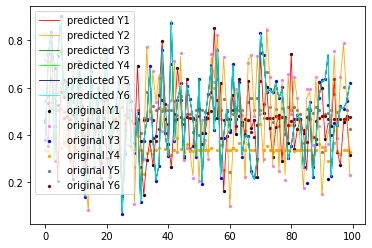

In [ ]:
X_ax = range(len(X_test))
#plt.scatter(y_test[:, 0],y_test[:, 1],y_test[:, 2], s=5, color="blue", label="original")
plt.scatter(X_ax, y_test.iloc[:,0], color="black", s=10,linewidth=0.1,label="original Y1")
plt.scatter(X_ax, y_test.iloc[:,1], color="violet", s=10,linewidth=0.1,label="original Y2")
plt.scatter(X_ax, y_test.iloc[:,2], color="blue", s=10,linewidth=0.1,label="original Y3")
plt.scatter(X_ax, y_test.iloc[:,3], color="orange", s=10,linewidth=0.1,label="original Y4")
plt.scatter(X_ax, y_test.iloc[:,4], color="gray", s=10,linewidth=0.1,label="original Y5")
plt.scatter(X_ax, y_test.iloc[:,5], color="maroon", s=10,linewidth=0.1,label="original Y6")


plt.plot(X_ax, Ypred2[:,0], lw=0.8, color="red", label="predicted Y1")
plt.plot(X_ax, Ypred2[:,1], lw=0.8, color="orange", label="predicted Y2")
plt.plot(X_ax, Ypred2[:,2], lw=0.8, color="green", label="predicted Y3")
plt.plot(X_ax, Ypred2[:,2], lw=0.8, color="lime", label="predicted Y4")
plt.plot(X_ax, Ypred2[:,2], lw=0.8, color="navy", label="predicted Y5")
plt.plot(X_ax, Ypred2[:,2], lw=0.8, color="aqua", label="predicted Y6")
plt.legend()
plt.show()

In [ ]:
rmse = np.sqrt(((Ypred2 - y_test) ** 2).mean())
#rmse = sqrt(mean_squared_error(y_test, Ypred2))
#rmse
print("rmse: ",rmse)

from statistics import mean
arrmse = mean(rmse)
print("arrmse: ",arrmse)
from sklearn.metrics import mean_absolute_error as mae
mae = mae(y_test, Ypred2)
print("Mean absolute error : ",mae)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, Ypred2)
print("R2: ",r2)
from sklearn.metrics import mean_squared_error
from math import sqrt
RMSE = sqrt(mean_squared_error(y_test, Ypred2))
#RMSE2 = sqrt(mean_squared_error(Ytest, Ypred2))

print('RMSE for Ypred2 is',RMSE)
#print('RMSE for Ypred2 is',RMSE2)

rmse:  Y1    0.032511
Y2    0.009757
Y3    0.031276
Y4    0.009496
Y5    0.008458
Y6    0.012233
dtype: float64
arrmse:  0.017288485266496855
Mean absolute error :  0.005890024858760937
R2:  0.972186852853225
RMSE for Ypred2 is 0.02017309657257215
